In [1]:
import math
import numpy as np
import time as time

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

from tqdm.auto import tqdm
from PIL import Image

import large_scale_UQ as luq
import skimage as ski
import matplotlib.pyplot as plt

import sys
sys.path.append('/disk/xray0/tl3/repos/sampling-tutorials/')
from functions import *


# Check if there's a GPU available and run on GPU, otherwise run on CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

True
1
0
NVIDIA A100-PCIE-40GB
Using device: cuda


In [2]:

path_data = '/disk/xray0/tl3/repos/large-scale-UQ/debug/sampling-outputs/frac_delta_1.0e-01_lmbd_1.0e+04_mu_2.0e+01_nsamples_1.0e+03_thinning_1.0e+03_frac_burn_2.0e-01_vars.npy'

data = np.load(path_data, allow_pickle=True)[()]


In [3]:

data.keys()


dict_keys(['post_meanvar', 'MC_X', 'logpi_thinning_trace', 'X', 'params', 'elapsed_time'])

In [6]:
data['MC_X'].shape

(1000, 256, 256)

In [10]:

MC_X_array = data['MC_X']

scale = [1,2,4,8]
n_samples = MC_X_array.shape[0]
nx = MC_X_array.shape[1]
ny = MC_X_array.shape[2]

saved_arrays = []
quantiles = []
means_list = []

alpha = 0.01
p = np.array([alpha, 1-alpha])

for k,i in enumerate(scale):
    
    downsample_array= np.zeros([n_samples,int(nx/(i*2)),int(ny/(i*2))])

    for j in range(n_samples):

        downsample_array[j]= ski.measure.block_reduce(MC_X_array[j], block_size=(i*2,i*2), func=np.mean)


    saved_arrays.append(downsample_array)

    quantiles.append(np.quantile(downsample_array, p, axis=0))
    means_list.append(np.mean(downsample_array, axis=0))




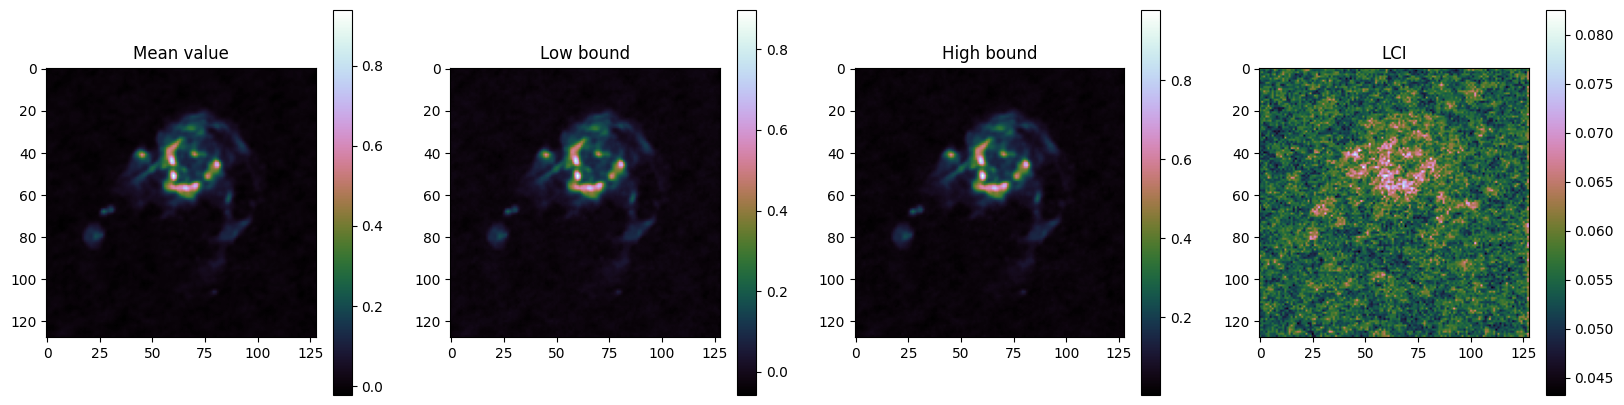

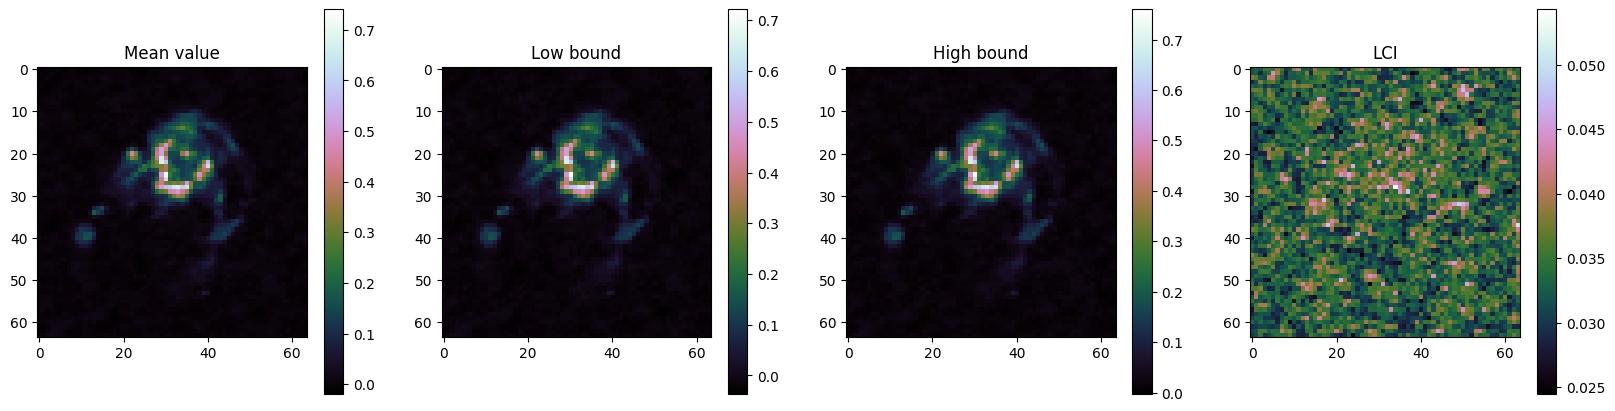

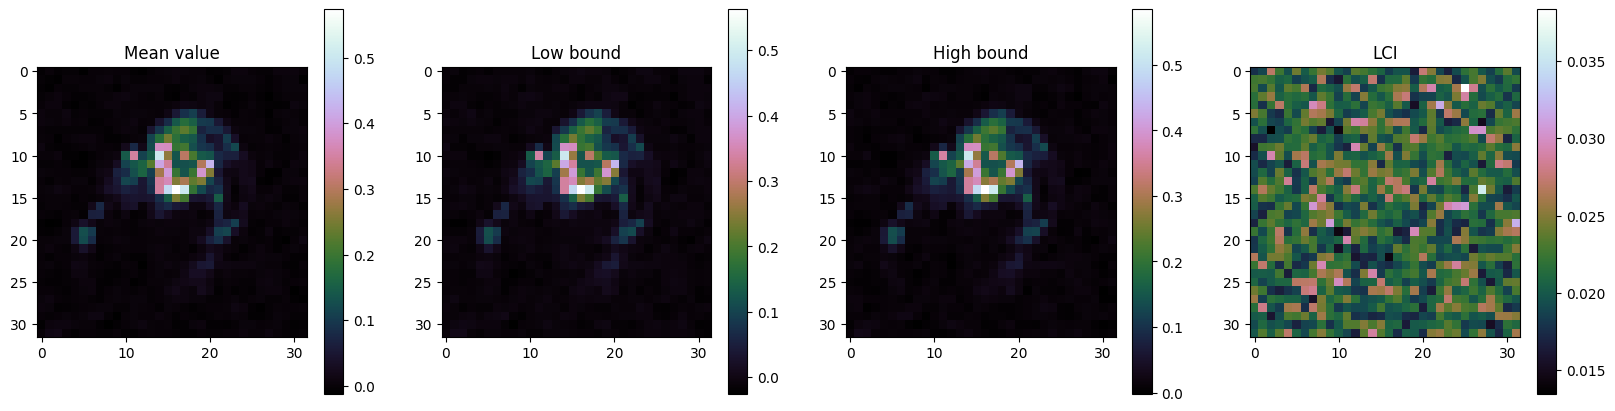

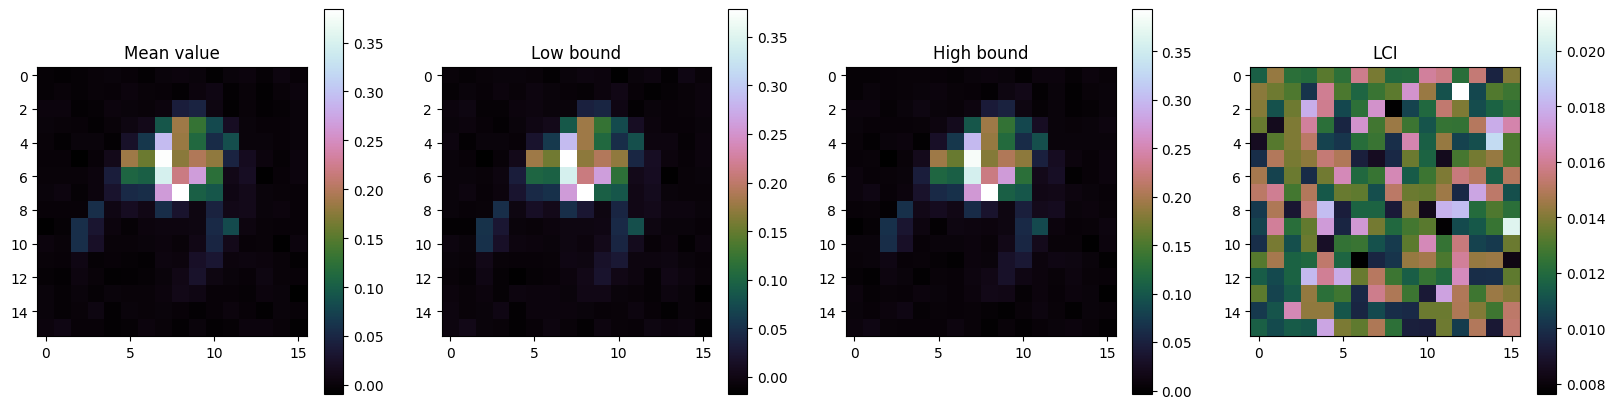

In [11]:
cmap='cubehelix'

for it in range(len(quantiles)):

    plt.figure(figsize=(20,5))

    plt.subplot(141)
    plt.imshow(means_list[it][:,:], cmap=cmap)
    plt.title('Mean value')
    plt.colorbar()

    plt.subplot(142)
    plt.imshow(quantiles[it][0,:,:], cmap=cmap)
    plt.title('Low bound')
    plt.colorbar()

    plt.subplot(143)
    plt.imshow(quantiles[it][1,:,:], cmap=cmap)
    plt.title('High bound')
    plt.colorbar()

    plt.subplot(144)
    plt.imshow(quantiles[it][1,:,:] - quantiles[it][0,:,:], cmap=cmap)
    plt.title('LCI')
    plt.colorbar()


    plt.show()